<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamB/blob/main/Demographie_Covid_Patient_innen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ziel**: Explorative Datenanalyse (EDA) der Covid19-Patient:innen

Die explorative Datenanalyse der Covid19-Patient:innen erfolgte in der SQL-Quelldatenbank in vier Schritten

1. Analyse des Datensets und Exploration
2. Datenbereinigung
3. Untersuchung der Variablen
4. Untersuchung der Beziehungen zwischen den Variablen



# Import der Libraries 

In [353]:
import pandas_profiling
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# Zum Anlegen der Darstellungen im Google Collab Notebook 
%matplotlib inline

In [274]:
from google.colab import drive
# Mounting des Drives zum Datenbankzugang 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Laden der Daten 


In [354]:
# Verbindung zur SQL-Quelldatenbank Datenbank 
DB_PATH = "/content/drive/Shareddrives/DMA_2023_D/Anastasia/source_covid19_test.db"

# connect to db
dwh_conn = sqlite3.connect(DB_PATH)

In [355]:
# Liste der Tabellen in Datenbank 
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('disease',), ('patients',), ('encounters',), ('careplans',), ('conditions',), ('medications',), ('procedures',), ('observations',), ('devices',), ('imaging_studies',), ('immunizations',)]


In [356]:
#Einlesen der SQL query Resultate in ein pandas DataFrame
# demographic data
df_patients = pd.read_sql_query("SELECT * FROM patients", dwh_conn)

df_conditions = pd.read_sql_query("SELECT * FROM conditions", dwh_conn)

In [357]:
# Vereiniung zweier Datensätze 
df = pd.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="inner")

In [ ]:
# Beenden der Datenbankverbindung
# dwh_conn.close()

# Analyse des Datensets und Exploration
In diesem Schritt werden die Daten auf ihre Struktur untersucht. Hierzu werden die folgenden Befehle aufgerufen: 
- df.head()
- df.shape
- df.columns
- df.info()
- df.describe()
- df.nunique()
- df.replace()

In [358]:
# .head() zeigt die ersten 5 Reihen des Datensets.
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,386661006,Fever (finding)
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,36955009,Loss of taste (finding)
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-02-20,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,840544004,Suspected COVID-19
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,840539006,COVID-19
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,1942-05-24,,999-24-5281,S99910925,X76697172X,Mr.,Romeo514,Morar593,,...,42.131465,-71.970333,1606235.0,5375.37,2020-03-03,2020-03-20,2812f4fc-6aba-0033-728b-7e569bb8adcc,9e07f1e2-f3bf-a2c6-504e-57e0568a5539,49727002,Cough (finding)


In [359]:
# .shape zeigt die Anzahl der Reihen und Spalten 
#size of dataset
df.shape

(6375, 31)

In [360]:
# .columns zeigt die Namen aller Spalten im Datenset. 
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [361]:
# Attributtypen
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 0 to 6374
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   6375 non-null   object 
 1   BIRTHDATE            6375 non-null   object 
 2   DEATHDATE            6375 non-null   object 
 3   SSN                  6375 non-null   object 
 4   DRIVERS              6375 non-null   object 
 5   PASSPORT             6375 non-null   object 
 6   PREFIX               6375 non-null   object 
 7   FIRST                6375 non-null   object 
 8   LAST                 6375 non-null   object 
 9   SUFFIX               6375 non-null   object 
 10  MAIDEN               6375 non-null   object 
 11  MARITAL              6375 non-null   object 
 12  RACE                 6375 non-null   object 
 13  ETHNICITY            6375 non-null   object 
 14  GENDER               6375 non-null   object 
 15  BIRTHPLACE           6375 non-null   o

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [362]:
# .describe zeigt Anzahl, Durchschnitt, Standartabweichung, Minimal- und Maximalwerte für numerische Variablen an.  
df.describe()

,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,CODE
count,6375.000000,6375.000000,6.375000e+03,6375.000000,6.375000e+03
mean,42.251169,-71.350119,8.063273e+05,3475.164659,7.888697e+11
std,0.302949,0.592587,5.707676e+05,2393.920497,1.018319e+13
min,41.251594,-73.301273,2.531530e+03,0.000000,2.229801e+07
25%,42.082114,-71.501729,2.541600e+05,2454.040000,5.767600e+07
50%,42.315334,-71.151908,7.514875e+05,2808.160000,2.671020e+08
75%,42.455424,-71.015124,1.356330e+06,4135.490000,8.405390e+08
max,42.879142,-69.947010,1.849960e+06,18194.610000,1.322810e+14


In [363]:
# .nunique(axis=0) zeigt die Anzahl einzigartiger Werte jeder Spalte. 
df.nunique(axis=0)


Id                      941
BIRTHDATE               881
DEATHDATE                41
SSN                     941
DRIVERS                 794
PASSPORT                737
PREFIX                    4
FIRST                   837
LAST                    456
SUFFIX                    3
MAIDEN                  202
MARITAL                   3
RACE                      4
ETHNICITY                 2
GENDER                    2
BIRTHPLACE              265
ADDRESS                 941
CITY                    236
STATE                     1
COUNTRY                  14
ZIP                     209
LAT                     941
LON                     941
HEALTHCARE_EXPENSES     902
HEALTHCARE_COVERAGE     555
START                   259
STOP                     76
PATIENT                 941
ENCOUNTER              1267
CODE                     41
DESCRIPTION              41
dtype: int64

In [364]:
# Erstezen von leeren Werten mit with NAN
df = df.replace(r'^\s*$', np.nan, regex=True)


#  Datenbereinigung


### Entfernung von Duplikaten


In [365]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


In [366]:

# Entfernung von Duplikaten unter Beibehaltung des ersten Werts. 
df.drop_duplicates(keep="first",inplace=True) 
print("Size of dataset after removing duplicated rows", df.shape)
  

Size of dataset after removing duplicated rows (6375, 31)


### Bei Belieben: Entfernen von überflüssigen Variablen 

In [367]:
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [368]:
df = df.drop(columns=['SSN', 'PREFIX', 'SUFFIX', 'MAIDEN', 'ZIP', 'DRIVERS', 'PASSPORT', 'FIRST', 'LAST', 'BIRTHPLACE', 'ADDRESS', 'STATE', 'COUNTRY', 'ENCOUNTER', 'ZIP', 'LAT', 'LON', 'CITY'])


### Umgang mit fehlenden Daten 
Es gibt mehrere Wege mit fehlenden Daten umzugehen. 

1. Löschung der fehlenden Werte bei geringer Anzahl. 
2. Für numerische Werte können diese durch Durchschnittswerte oder Median Werte ersetzt werden. Letzteres wird umgesetzt, wenn es große Ausreißer gibt. 
3. Für kategorische Werte können fehlende Werte mit "mode" ersetzt werden, den häufigen Werten. We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

In [369]:
df.shape

(6375, 14)

In [370]:
# Prozentsatz der nicht fehlenden Werte: 
df.count()/len(df) * 100

Id                     100.000000
BIRTHDATE              100.000000
DEATHDATE                7.576471
MARITAL                 69.490196
RACE                   100.000000
ETHNICITY              100.000000
GENDER                 100.000000
HEALTHCARE_EXPENSES    100.000000
HEALTHCARE_COVERAGE    100.000000
START                  100.000000
STOP                    85.866667
PATIENT                100.000000
CODE                   100.000000
DESCRIPTION            100.000000
dtype: float64

In [371]:
# Anzahl der Null-Werte jeder Spalte: 
df.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE              5892
MARITAL                1945
RACE                      0
ETHNICITY                 0
GENDER                    0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
START                     0
STOP                    901
PATIENT                   0
CODE                      0
DESCRIPTION               0
dtype: int64

In [372]:
# Auffüllen der Nullwerte mit dem heutigem Datum
df["DEATHDATE"] = df.DEATHDATE.fillna(pd.to_datetime("today"))
df["STOP"] = df.STOP.fillna(pd.to_datetime("today"))

In [373]:
# Auffüllen der Nullwerte mit "mode"
df['MARITAL'].fillna(df['MARITAL'].mode()[0], inplace=True)

In [374]:
# Konvertierung zu "date"
df["DEATHDATE"] = pd.to_datetime(df["DEATHDATE"])
df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])
df["START"] = pd.to_datetime(df["START"])
df["STOP"] = pd.to_datetime(df["STOP"])

In [375]:
# Berechnung des Alters und Dauer 
df["AGE"] = df.DEATHDATE.dt.year - df.BIRTHDATE.dt.year
df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)
df.DURATION

<ipython-input-375-97d3ca675d55>:3: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)


0         1
1         1
2         0
3         1
4         0
       ... 
6370     35
6371     35
6372     35
6373    377
6374     75
Name: DURATION, Length: 6375, dtype: int64

In [376]:
# Kontrolle: Anzahl Null-Werte jeder Spalte: 
df.isnull().sum()

Id                     0
BIRTHDATE              0
DEATHDATE              0
MARITAL                0
RACE                   0
ETHNICITY              0
GENDER                 0
HEALTHCARE_EXPENSES    0
HEALTHCARE_COVERAGE    0
START                  0
STOP                   0
PATIENT                0
CODE                   0
DESCRIPTION            0
AGE                    0
DURATION               0
dtype: int64

# Univariate Analyse

## Gruppierung

In [377]:
# Gruppierung der Patient:innen für "Id"
df.groupby(["Id"]).size()

Id
0033cec2-67d3-39ec-b0f4-29f91a2918d6     4
00680fcd-0ef2-99c5-f69d-59463206750f    15
00f4a426-4746-6513-1775-1e8650e2f6b5     5
00f8ffa0-e135-059c-32e9-54a79b5f612e     7
00ff2a47-af82-8681-cb1d-428471df02f0    10
                                        ..
ff1a2c6d-6ae4-1737-ff36-4e76782efe6c     5
ff2d586c-f770-a795-c9eb-0b0d39447e48     5
ff9e749b-0abc-22f8-0d62-6912b87781b1     6
ffd905f3-45fb-b2a7-7429-bf864ef29d81    11
ffe52b9f-cdf1-d315-9286-e64d370edde4     5
Length: 941, dtype: int64

In [378]:
df.groupby(["Id", "CODE"]).size()

Id                                    CODE     
0033cec2-67d3-39ec-b0f4-29f91a2918d6  49727002     1
                                      386661006    1
                                      840539006    1
                                      840544004    1
00680fcd-0ef2-99c5-f69d-59463206750f  25064002     1
                                                  ..
ffe52b9f-cdf1-d315-9286-e64d370edde4  25064002     1
                                      36955009     1
                                      49727002     1
                                      386661006    1
                                      840544004    1
Length: 6375, dtype: int64

## Histogramme



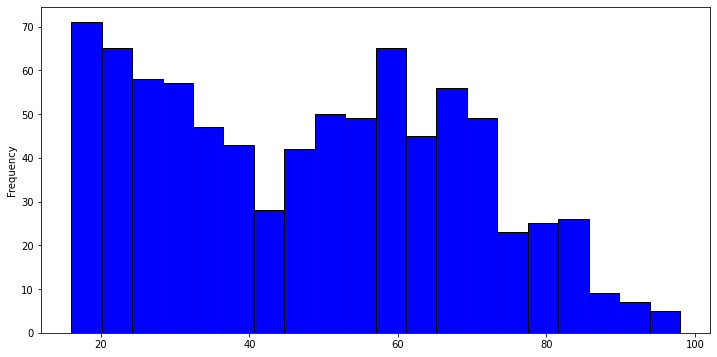

In [437]:
#Alterverteilung der Patient:innen
df_unique['AGE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='blue',edgecolor='black')


## Boxplot Altersverteilung


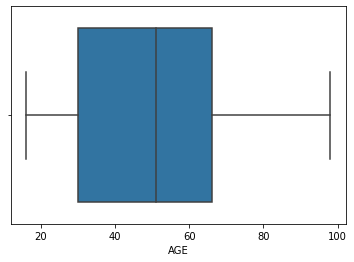

In [439]:
sns.boxplot(x=df_unique["AGE"])

## Countplot

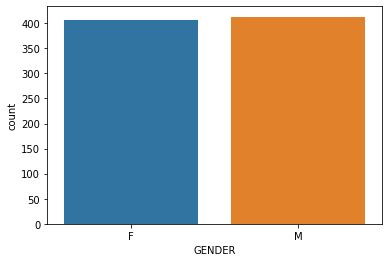

In [389]:
df_unique = df.drop_duplicates(subset="Id")
sns.countplot(x="GENDER", data=df_unique)

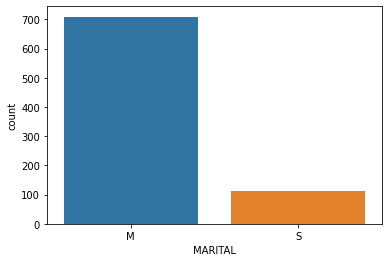

In [391]:
sns.countplot(x="MARITAL", data=df_unique)


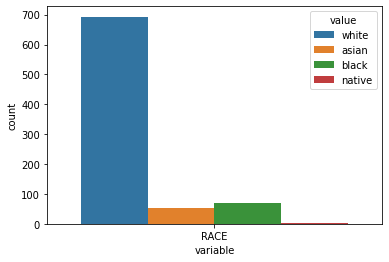

In [393]:
sns.countplot(x="variable", hue= "value", data=pd.melt(df_unique[["RACE"]]))


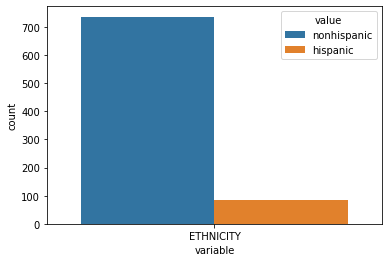

In [394]:
sns.countplot(x="variable", hue= "value", data=pd.melt(df_unique[["ETHNICITY"]]))


In [397]:
# Konvertierung von kategorischden Variablen zu numerischen Variablen 
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.MARITAL.replace(['M', 'S'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)
df.ETHNICITY.replace(["nonhispanic", "hispanic"], [0, 1], inplace=True)

#  Multivariate Analyse: Analyse der Beziehungen zwischen Variablen 

Korrelationmatrix und Scatterplots sind nützliche Werkzeuge, um die Beziehung zwischen den Variablen darzustellen. 

### Correlation Matrix


In [398]:
# Liste der Spalten
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 6352
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   5585 non-null   object        
 1   BIRTHDATE            5585 non-null   datetime64[ns]
 2   DEATHDATE            5585 non-null   datetime64[ns]
 3   MARITAL              5585 non-null   int64         
 4   RACE                 5585 non-null   object        
 5   ETHNICITY            5585 non-null   int64         
 6   GENDER               5585 non-null   int64         
 7   HEALTHCARE_EXPENSES  5585 non-null   float64       
 8   HEALTHCARE_COVERAGE  5585 non-null   float64       
 9   START                5585 non-null   datetime64[ns]
 10  STOP                 5585 non-null   datetime64[ns]
 11  PATIENT              5585 non-null   object        
 12  CODE                 5585 non-null   int64         
 13  DESCRIPTION          5585 non-nul

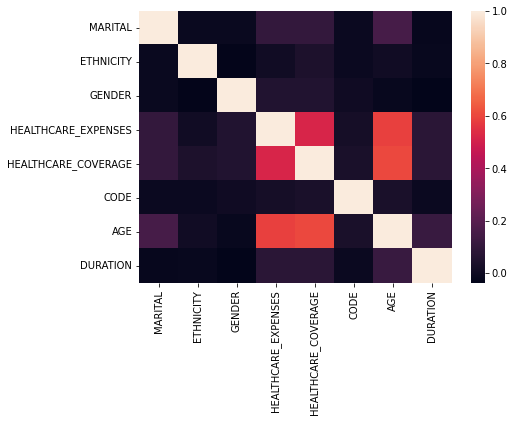

In [440]:
# Generierung der Korrelationsmatrix 
corr = df_unique.corr()

plt.figure(figsize=(7, 5))
# Heatmap 
sns.heatmap(corr, annot=False)

In [442]:
# df subset numerischer Varialen
numdf = df_unique.select_dtypes(include=np.number)
# df subset kategorischer Variablen
catdf = df_unique.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((5585, 8), (5585, 8))

In [443]:
# Selektieren eines Thresholds
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns

Index(['MARITAL', 'ETHNICITY', 'GENDER', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'CODE', 'AGE', 'DURATION'],
      dtype='object')

*Basierend auf dem Heatmap gibt eine Korrelation zwischen Alter und Gesundheitsausgaben, diese ist allerdings geringer als das gesetzte Threshold von 0.7 


### Scatterplots der verschiedenen Variablen


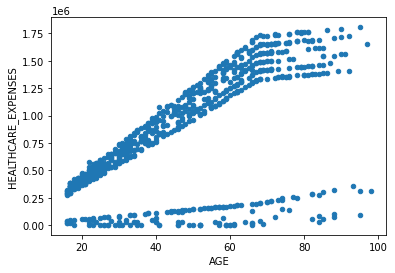

In [403]:
df_unique.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


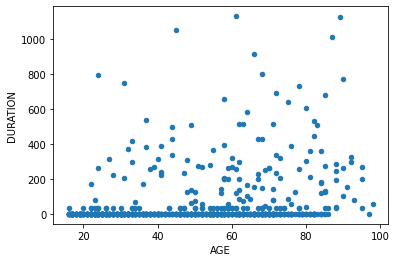

In [404]:
df_unique.plot(kind='scatter', y='DURATION', x='AGE')


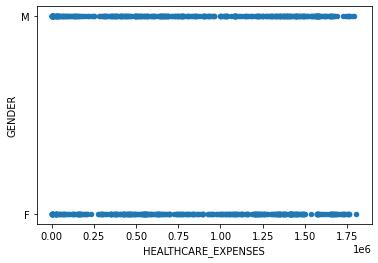

In [406]:
df_unique.plot(kind='scatter', x='HEALTHCARE_EXPENSES', y='GENDER')
